In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("../Datasets/Fashion_Trend.csv")

In [4]:
df

,Brand,Description,Product_ID,Discount_Price,Original_Price,Gender,Category,Discounted_amount,Discount_Percentage,Product_Name,Price_Segment,Discount_Tier
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974,1299,Men,Activewear,325,25.02,Track Pants,Mid (₹500–₹1499),Moderate (20-40%)
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499,1499,Men,Activewear,0,0.00,Sports Shoes,Mid (₹500–₹1499),No Discount
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461,549,Men,Activewear,88,16.03,Crew-Neck T-shirt,Mid (₹500–₹1499),Light (10-20%)
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189,1699,Men,Activewear,510,30.02,Print Joggers,Premium (₹1500–₹3999),Moderate (20-40%)
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425,599,Men,Activewear,174,29.05,Crew-Neck T-shirt,Mid (₹500–₹1499),Moderate (20-40%)
...,...,...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299,1299,Women,Westernwear,0,0.00,Printed Top,Mid (₹500–₹1499),No Discount
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099,2099,Women,Westernwear,0,0.00,Cropped Pants,Premium (₹1500–₹3999),No Discount
31579,ajio,Striped City Shorts with Belt,460328005002,1499,1499,Women,Westernwear,0,0.00,City Shorts,Mid (₹500–₹1499),No Discount
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999,2999,Women,Westernwear,0,0.00,Denim Jacket,Premium (₹1500–₹3999),No Discount


In [13]:
df.columns

Index(['Brand', 'Description', 'Product_ID', 'Discount_Price',
       'Original_Price', 'Gender', 'Category', 'Discounted_amount',
       'Discount_Percentage', 'Product_Name', 'Price_Segment',
       'Discount_Tier'],
      dtype='object')

# Data Preparation:

## Check and handle missing values

In [14]:
df.isnull().sum()

Brand                  0
Description            0
Product_ID             0
Discount_Price         0
Original_Price         0
Gender                 0
Category               0
Discounted_amount      0
Discount_Percentage    0
Product_Name           0
Price_Segment          0
Discount_Tier          0
dtype: int64

## Ensure datatypes are in correct format

In [15]:
df.dtypes

Brand                   object
Description             object
Product_ID               int64
Discount_Price           int64
Original_Price           int64
Gender                  object
Category                object
Discounted_amount        int64
Discount_Percentage    float64
Product_Name            object
Price_Segment           object
Discount_Tier           object
dtype: object

# Exploratory Data Analysis (EDA):

## Distribution of numerical features

In [16]:
df.describe()

,Product_ID,Discount_Price,Original_Price,Discounted_amount,Discount_Percentage
count,3.158200e+04,31582.000000,31582.000000,31582.000000,31582.000000
mean,4.439001e+11,929.759832,1418.094769,488.334938,32.979031
std,5.715579e+09,727.207471,945.684511,544.062245,24.667178
min,4.200088e+11,75.000000,149.000000,0.000000,0.000000
25%,4.411142e+11,479.000000,799.000000,0.000000,0.000000
50%,4.411360e+11,735.000000,1299.000000,356.000000,35.040000
75%,4.501273e+11,1199.000000,1799.000000,749.000000,50.930000
max,4.608526e+11,16999.000000,19999.000000,11999.000000,85.010000


#### The average discount for the products is between 33 to 35%.

## Frequency distribution of categorical features

In [17]:
df.Category.unique()

array(['Activewear', 'Bottomwear', 'Footwear', 'Innerwear', 'Topwear',
       'Ethnicwear', 'Fusionwear', 'Lingerie', 'Westernwear'],
      dtype=object)

In [18]:
df.Category.nunique()

9

In [19]:
c=df.Category.value_counts()
c

Category
Topwear        7110
Westernwear    6641
Footwear       6030
Ethnicwear     5265
Bottomwear     2984
Activewear     2134
Fusionwear      997
Lingerie        325
Innerwear        96
Name: count, dtype: int64

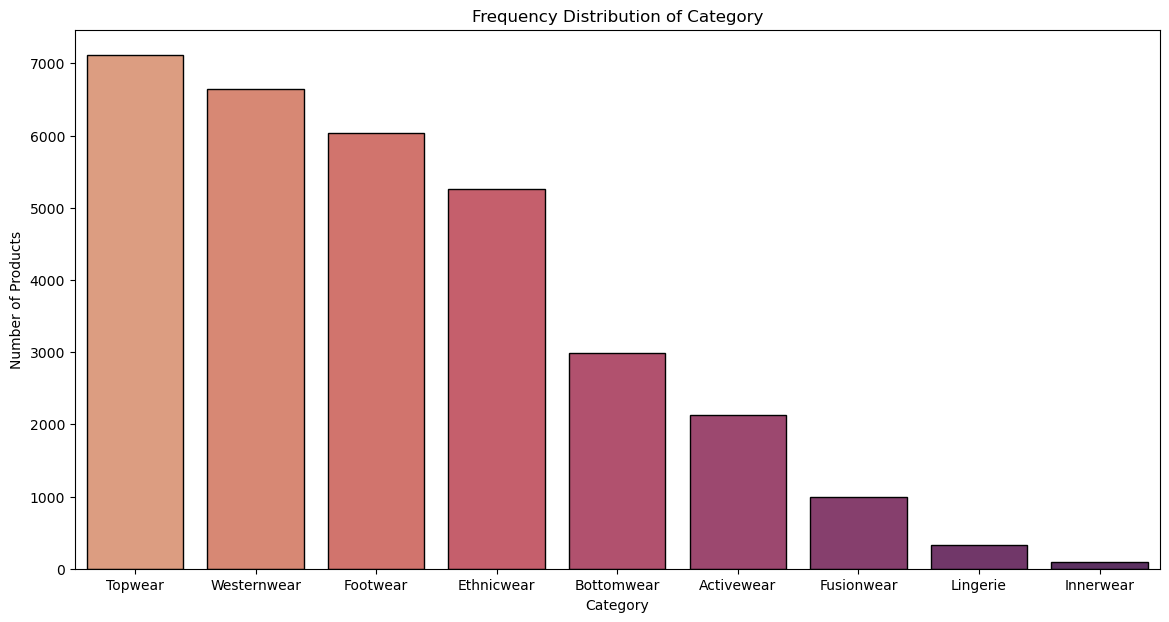

In [20]:
plt.figure(figsize=(14,7))
sb.barplot(x=c.index, y=c.values, hue=c.index, palette="flare",edgecolor='black')
plt.title("Frequency Distribution of Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

In [21]:
df.Product_Name.unique()

array(['Track Pants', 'Sports Shoes', 'Crew-Neck T-shirt', ...,
       'Drop-Shoulder Shirt', 'Cold-Shoulder Shirt',
       'Polka-Dotted Trousers'], dtype=object)

In [22]:
df.Product_Name.nunique()

1799

In [23]:
df.Product_Name.value_counts()

Product_Name
Crew-Neck T-shirt        2312
Straight Kurta           2126
Fit Shirt                2117
Polo T-shirt             1126
A-line Kurta              803
                         ... 
Self-Designed Shirt         1
fit Shirt                   1
Heavy-Wash Shirt            1
Waistcoat                   1
Polka-Dotted Trousers       1
Name: count, Length: 1799, dtype: int64

In [24]:
df.Price_Segment.value_counts()

Price_Segment
Mid (₹500–₹1499)         18237
Premium (₹1500–₹3999)     9872
Low (<₹500)               2972
Luxury (₹4000+)            501
Name: count, dtype: int64

In [25]:
df.Discount_Tier.value_counts()

Discount_Tier
Deep (>40%)           15194
 No Discount           8107
Moderate  (20-40%)     6660
Light (10-20%)         1621
Name: count, dtype: int64

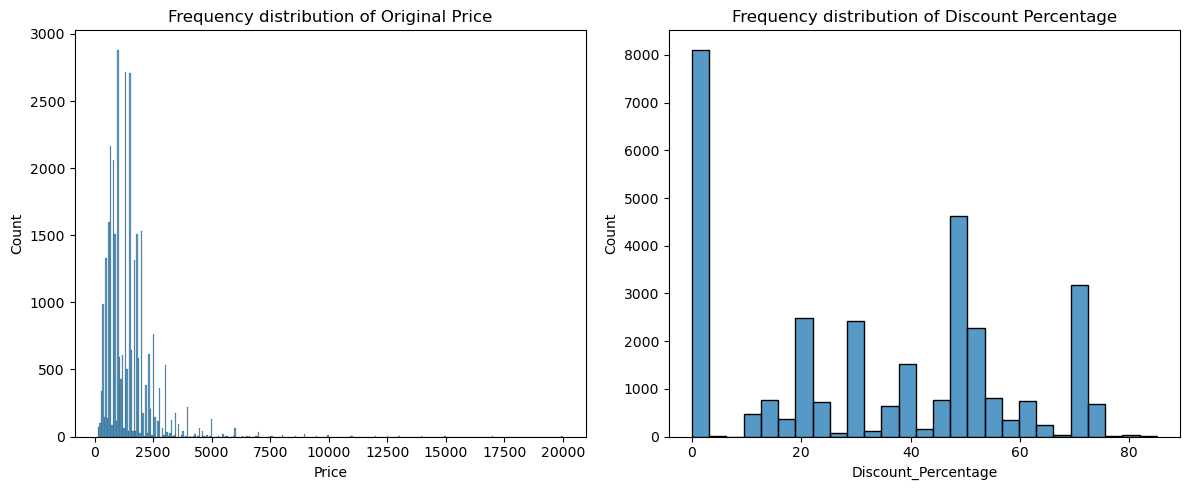

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.histplot(df["Original_Price"])
plt.title("Frequency distribution of Original Price")
plt.xlabel("Price")

plt.subplot(1,2,2)
sb.histplot(df["Discount_Percentage"])
plt.title("Frequency distribution of Discount Percentage")
plt.xlabel("Discount_Percentage")

plt.tight_layout()
plt.show()

In [27]:
df.Brand.value_counts()

Brand
performax                3029
teamspirit               1908
dnmx                     1757
netplay                  1698
avaasa-mix-n-match       1507
                         ... 
bon-bon                     1
awb                         1
hk-colours-of-fashion       1
jadu                        1
classic-polo                1
Name: count, Length: 191, dtype: int64

In [28]:
g=df.Gender.value_counts()
g

Gender
Women    17207
Men      14375
Name: count, dtype: int64

## Identify Outliers in Price and Discount

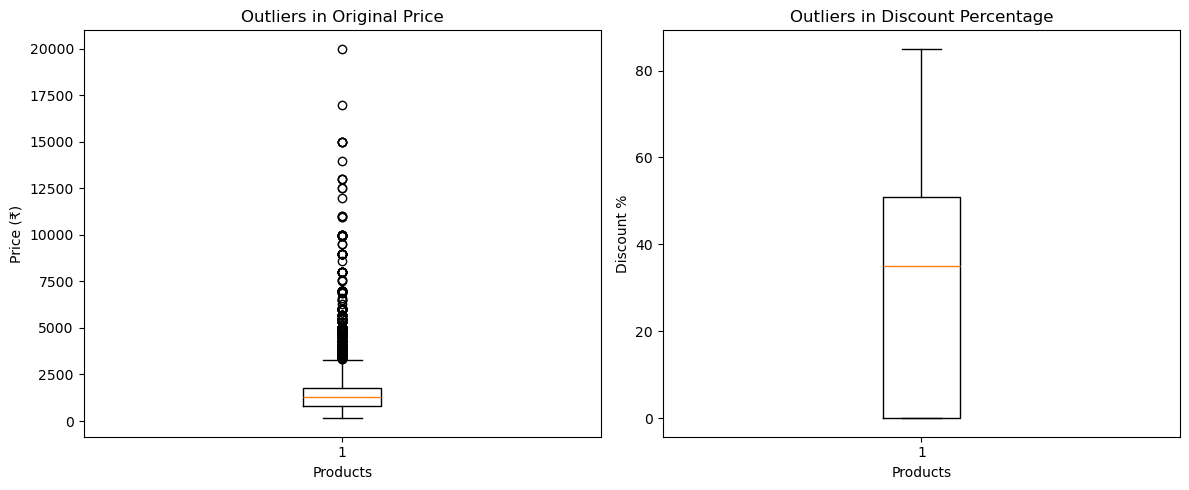

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot(df["Original_Price"])
plt.title("Outliers in Original Price")
plt.xlabel("Products")
plt.ylabel("Price (₹)")

plt.subplot(1,2,2)
plt.boxplot(df["Discount_Percentage"])
plt.title("Outliers in Discount Percentage")
plt.xlabel("Products")
plt.ylabel("Discount %")

plt.tight_layout()
plt.show()

# Brand & Category Analysis:

## Top Brands:
### Which brands have the most products?

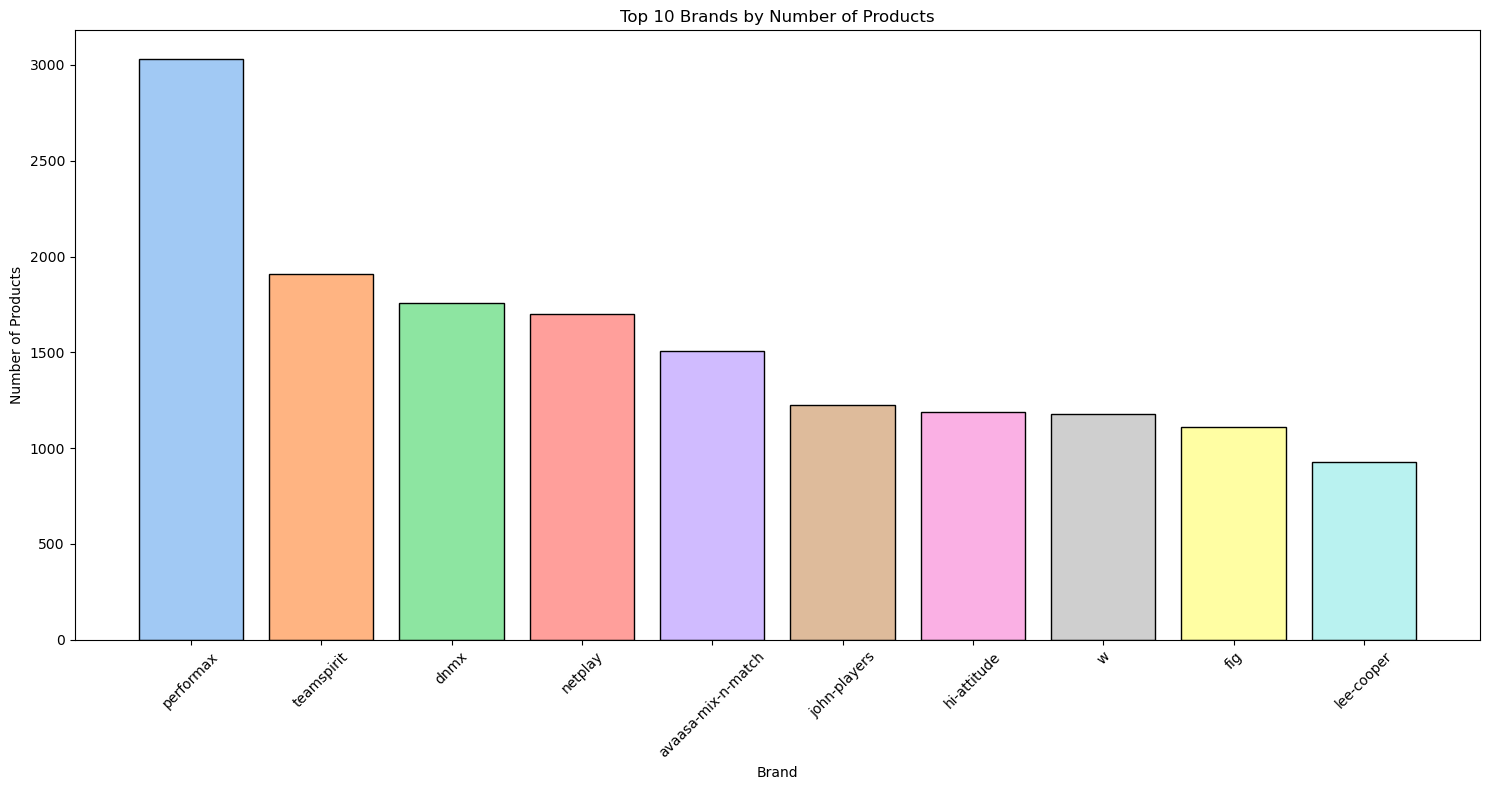

In [30]:
brand_counts = df.Brand.value_counts().reset_index().head(10)
brand_counts.columns = ['Brand','Product_Count']

plt.figure(figsize=(15,8))
plt.bar(brand_counts["Brand"], brand_counts["Product_Count"], color=sb.color_palette("pastel", len(brand_counts)),edgecolor='black')
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Category Analysis:
### Which categories dominate overall?

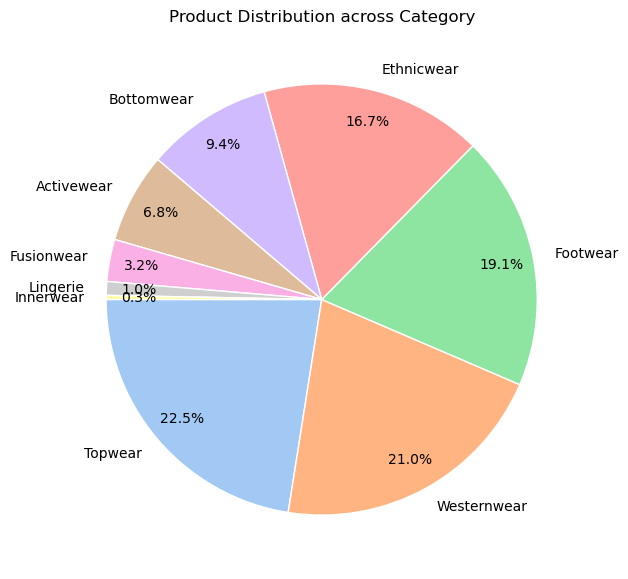

In [31]:
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Product_Count"]

plt.figure(figsize=(14,7))
plt.pie(category_counts["Product_Count"], labels=category_counts["Category"], autopct='%1.1f%%', startangle=180,
           pctdistance=0.85,labeldistance=1.1,wedgeprops={'linewidth':1, 'edgecolor':'white'},
           colors=sb.color_palette("pastel", len(category_counts)))
plt.title("Product Distribution across Category")
plt.show()

#### The Brands that have the  most products are Performax, Teamspirit,DNMX, Netplay and Avaasa-mix-n-match.
#### The categories that dominate overall are Topwear, Westernwear, Footwear,  Ethnicwear and Bottomwear.

## Category vs Price Segment:
### Which categories dominate in Budget, Mid, Premium, Luxury?

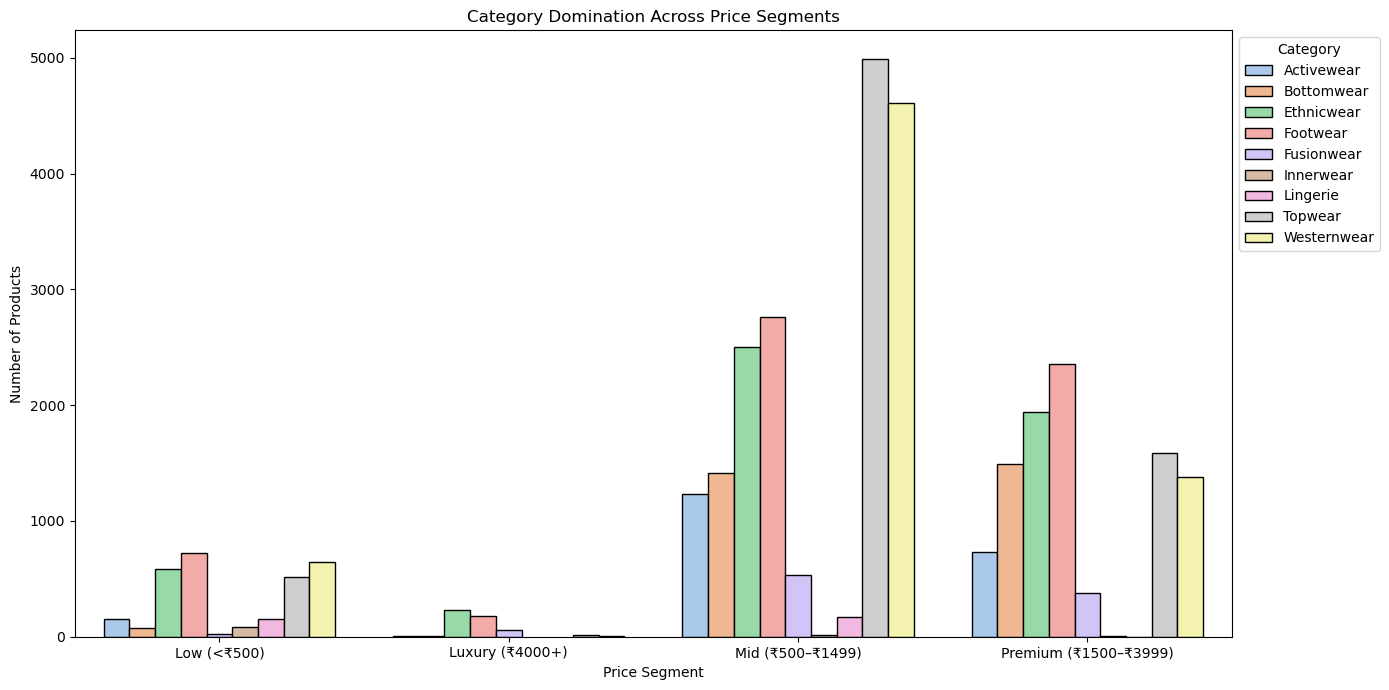

In [32]:
price_category_counts = df.groupby(['Price_Segment','Category']).size().reset_index(name="Count")

plt.figure(figsize=(14,7))
sb.barplot(x=price_category_counts.Price_Segment, y=price_category_counts.Count, 
            hue=price_category_counts.Category, palette="pastel",edgecolor='black')

plt.title("Category Domination Across Price Segments")
plt.xlabel("Price Segment")
plt.ylabel("Number of Products")
plt.legend(title="Category", bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### The categories dominating the Low price segment are Footwear and Westernwear. For Mid segment its Topwear and Westernwear. For Premium segment and Luxury segment its Footwear and Ethnicwear.

# Product Type Analysis:

## Which product types are most common?

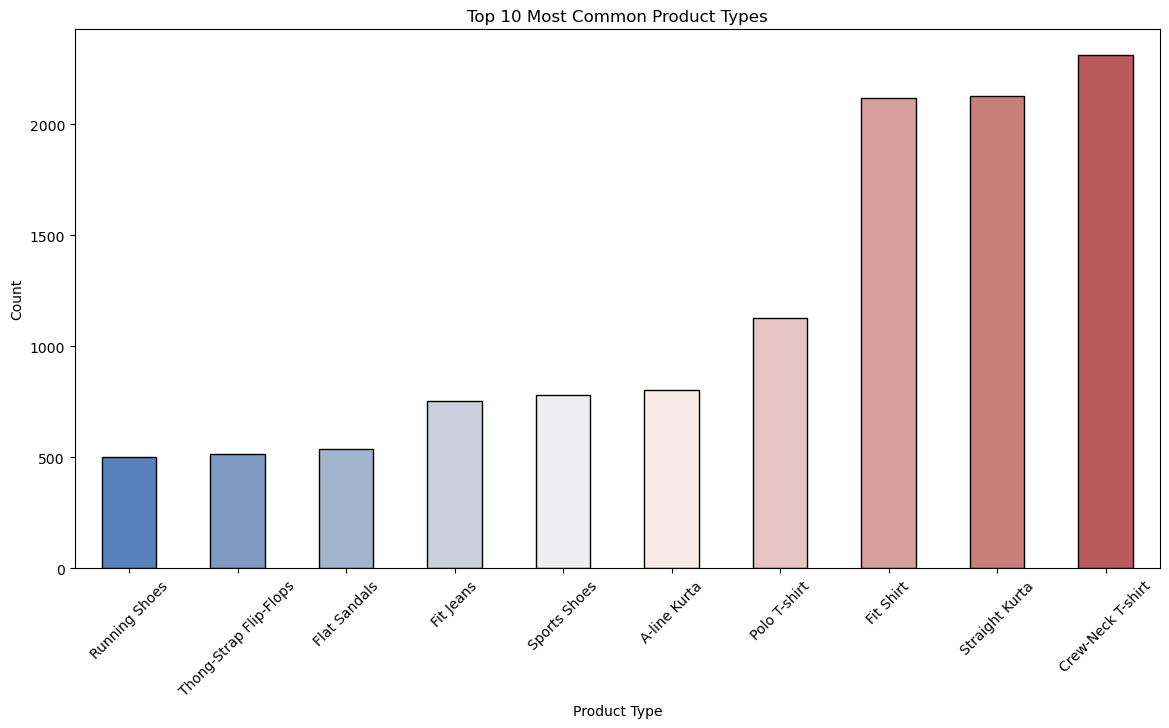

In [33]:
product_counts=df.Product_Name.value_counts().head(10)

plt.figure(figsize=(14,7))
product_counts.sort_values().plot(kind="bar", color=sb.color_palette("vlag", len(product_counts)),
                                  edgecolor="black")
plt.title("Top 10 Most Common Product Types")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Compare product type distribution across genders.

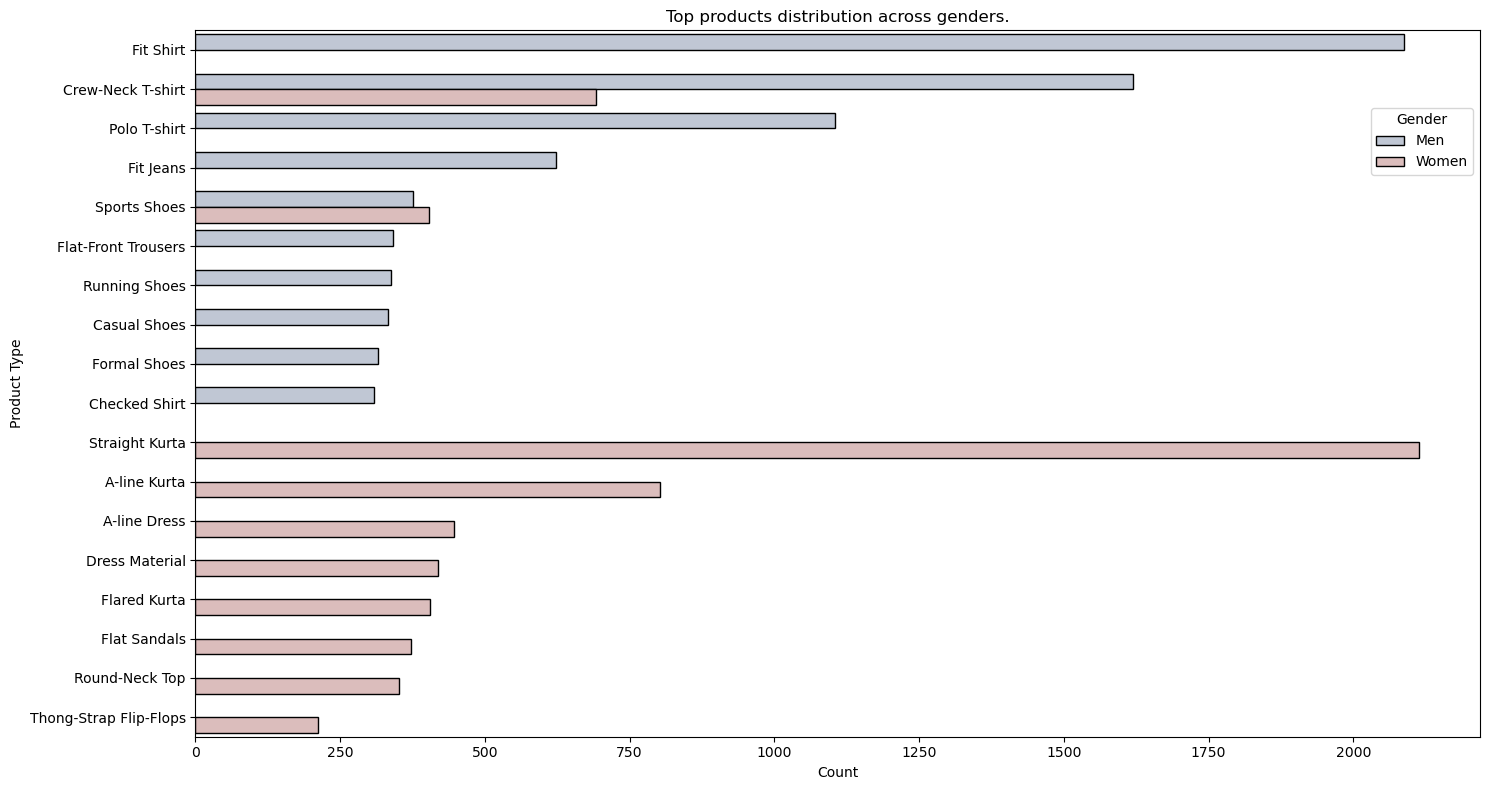

In [34]:
top_products_across_gender = df.groupby(['Gender','Product_Name']).size().reset_index(name='Count').sort_values(['Gender','Count'],ascending=[True,False])
top_products_across_gender = top_products_across_gender.groupby('Gender').head(10)

plt.figure(figsize=(15,8))
sb.barplot(y=top_products_across_gender.Product_Name, x=top_products_across_gender.Count,
             hue=top_products_across_gender.Gender, dodge=True, palette="vlag",edgecolor='black')

plt.title("Top products distribution across genders.")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.legend(title="Gender",bbox_to_anchor=(1.0,0.9))
plt.tight_layout()
plt.show()

## Identify top product types within each category.

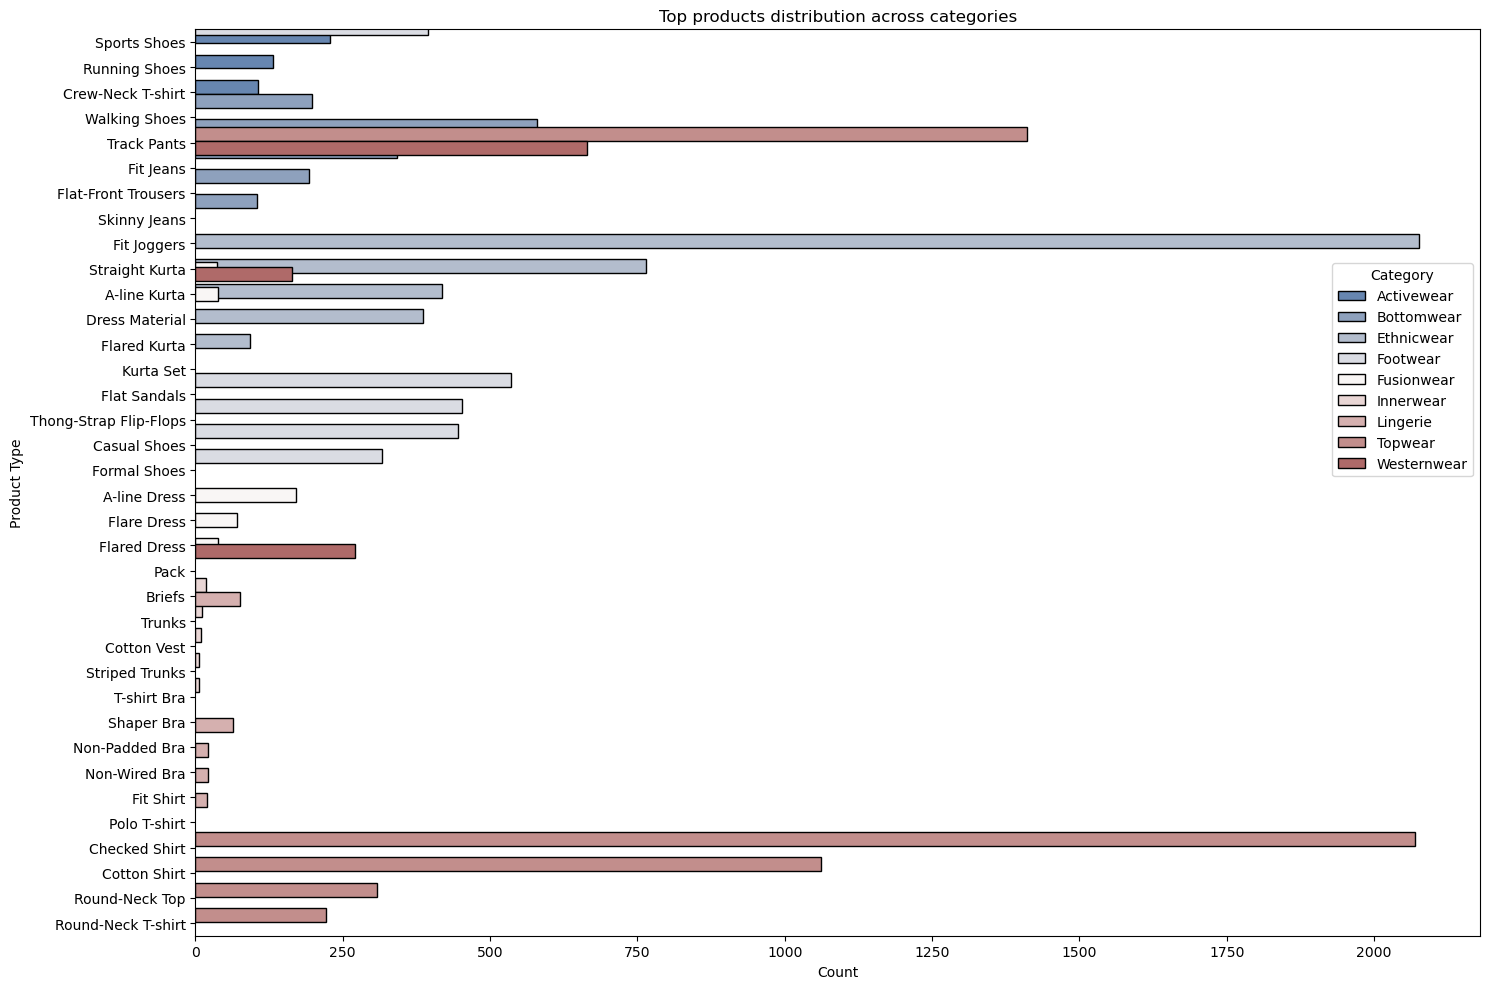

In [35]:
top_products_across_category = df.groupby(['Category','Product_Name']).size().reset_index(name='Count').sort_values(['Category','Count'],ascending=[True,False])
top_products_across_category = top_products_across_category.groupby('Category').head(5)

plt.figure(figsize=(15,10))
sb.barplot(y=top_products_across_category.Product_Name, x=top_products_across_category.Count,
             hue=top_products_across_category.Category, dodge=True, palette="vlag",errorbar=None,width=5.0,edgecolor='black')

plt.title("Top products distribution across categories")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.legend(title="Category",bbox_to_anchor=(1.0,0.75))
plt.tight_layout()
plt.show()

#### Most common product types are Crew-Neck T-shirt, Straight Kurta, Fit shirt, Polo T-Shirt, A-Line Kurta. Among women Straight Kurta is most common and among Men is Fit Shirt.

# Discount Analysis:

## Discount Tier Comparison:
### How many products fall into each discount tier?

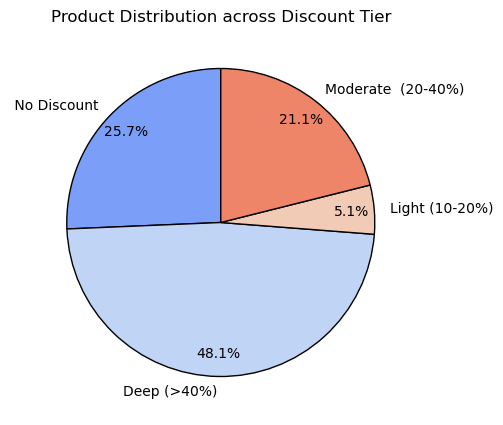

In [36]:
discount_counts = df["Discount_Tier"].value_counts().sort_index()

plt.figure(figsize=(8,5))
discount_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,pctdistance=0.85,labeldistance=1.1,
                     wedgeprops={'linewidth':1, 'edgecolor':'black'},
                     colors=sb.color_palette("coolwarm", len(discount_counts)))

plt.title("Product Distribution across Discount Tier")
plt.ylabel("")
plt.show()

## Discount % vs Product Type: 
### Which product types get the highest average discount?

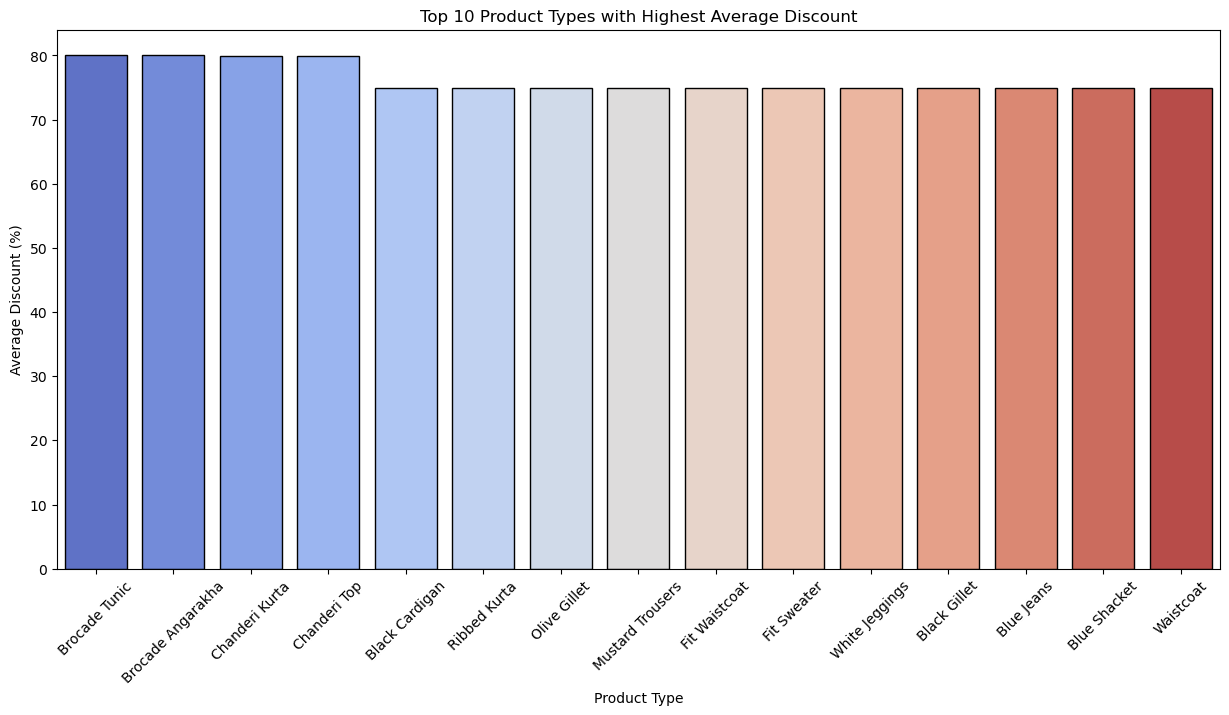

In [37]:
avg_discount = df.groupby("Product_Name")["Discount_Percentage"].mean().reset_index().sort_values("Discount_Percentage", ascending=False).head(15)

plt.figure(figsize=(15,7))
sb.barplot(x=avg_discount.Product_Name, y=avg_discount.Discount_Percentage,palette='coolwarm',edgecolor='black')
plt.title("Top 10 Product Types with Highest Average Discount")
plt.xlabel("Product Type")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45)
plt.show()

## Discounts Across Categories:
### Which categories rely most on heavy discounts?

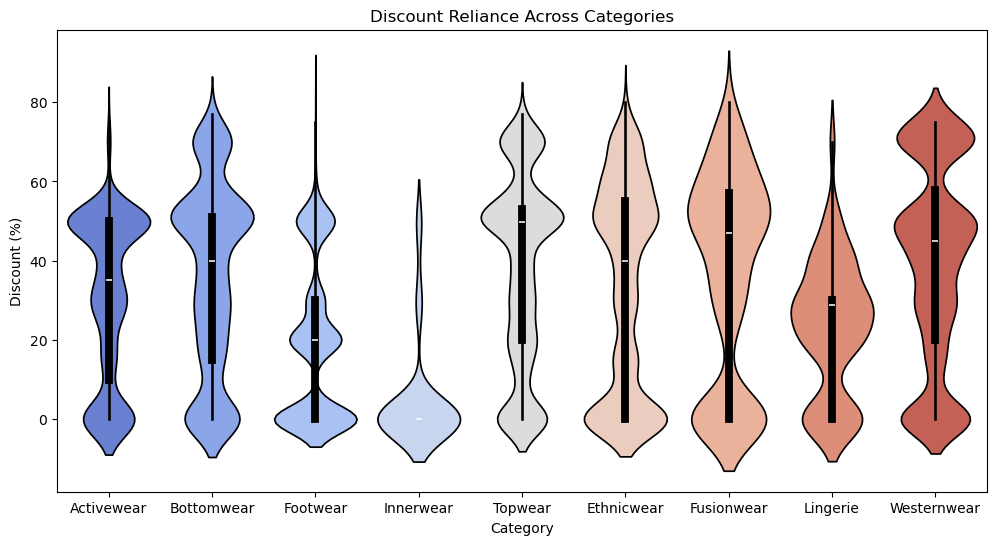

In [38]:
avg_discount_category = df.groupby("Category")["Discount_Percentage"].mean().reset_index().sort_values("Discount_Percentage", ascending=False)

plt.figure(figsize=(12,6))
sb.violinplot(x=df.Category, y=df.Discount_Percentage, palette="coolwarm",edgecolor='black')

plt.title("Discount Reliance Across Categories")
plt.xlabel("Category")
plt.ylabel("Discount (%)")
plt.show()

## Price vs Discount Analysis:
### Are higher-priced products more likely to have higher discounts?

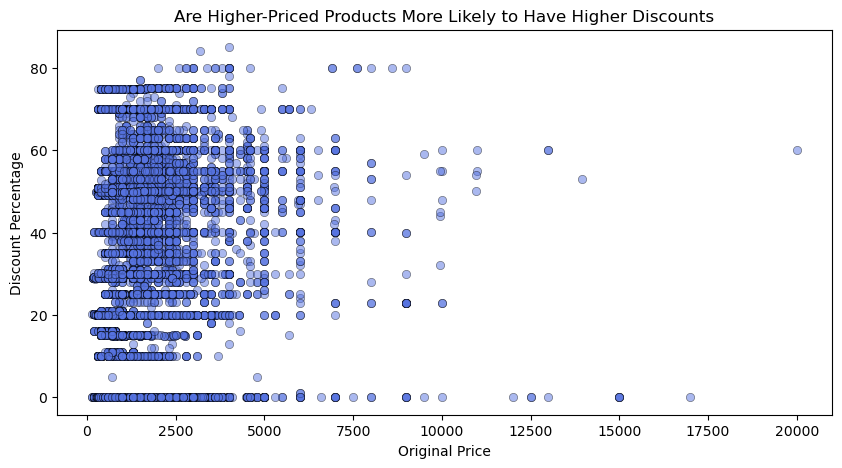

In [39]:
corr=df[['Original_Price','Discount_Percentage']].corr()

plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x="Original_Price", y="Discount_Percentage", alpha=0.5,color=sb.color_palette("coolwarm", 10)[0],edgecolor='black')

plt.title("Are Higher-Priced Products More Likely to Have Higher Discounts")
plt.xlabel("Original Price")
plt.ylabel("Discount Percentage")
plt.show()

#### The largest portion of the discount is in the Deep Segment which is more than 40% discount. The categories with highest discount are Brocade Tunic, Brocade Angarakha and Chanderi Kurta. Westernwear relies most on discount. Higher priced products do not rely on higher discounts.

# Gender Analysis:

## Which categories and product types dominate for Men vs Women vs Kids?

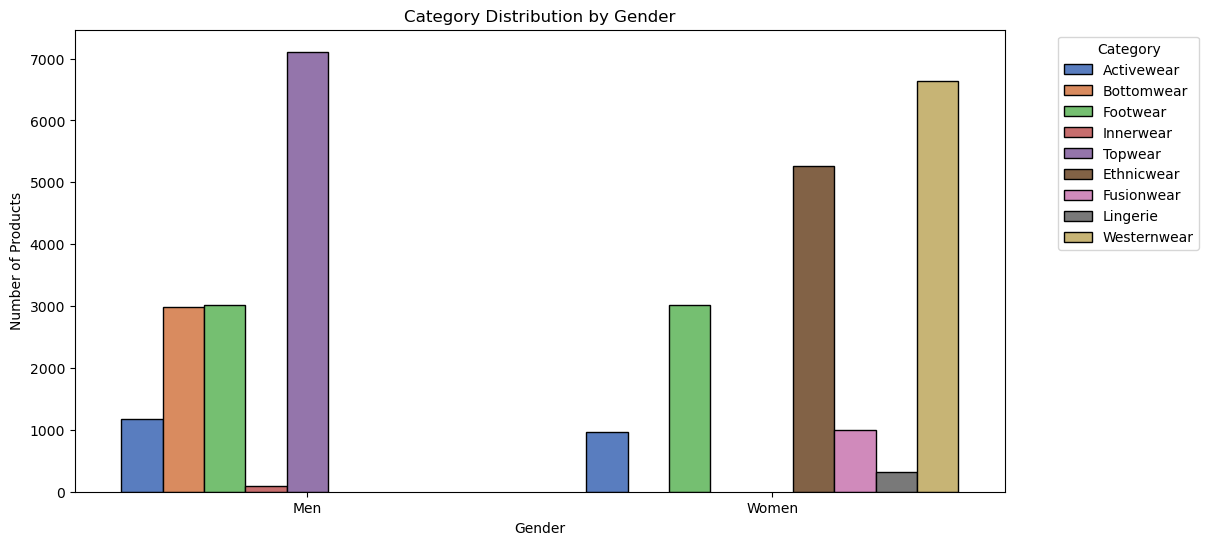

In [40]:
category_gender = df.groupby(["Gender", "Category"]).size().reset_index(name="Count").sort_values(["Gender","Count"], ascending=[True, False]).head(10)
product_gender = df.groupby(["Gender", "Product_Name"]).size().reset_index(name="Count").sort_values(["Gender","Count"], ascending=[True, False]).head(10)

plt.figure(figsize=(12,6))
sb.countplot(data=df, x="Gender", hue="Category",palette="muted",edgecolor='black')

plt.title("Category Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Products")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Gender-wise average discount %

In [41]:
gender_discount = df.groupby("Gender")["Discount_Percentage"].mean().reset_index().sort_values("Discount_Percentage", ascending=False)
print(gender_discount)

  Gender  Discount_Percentage
0    Men             33.31903
1  Women             32.69499


## Identify whether men’s or women’s products are more discount-driven

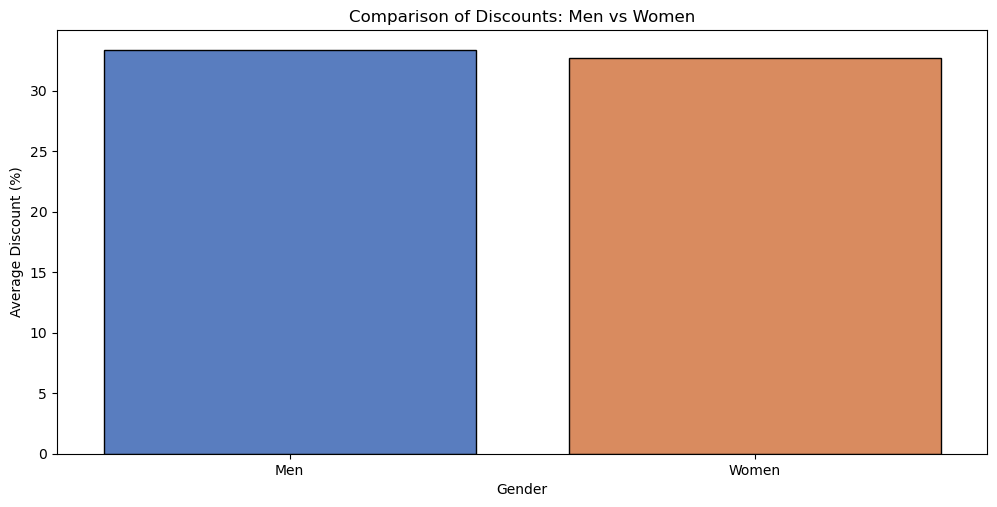

In [42]:
plt.figure(figsize=(12,5.5))
sb.barplot(x=gender_discount.Gender, y=gender_discount.Discount_Percentage, palette="muted",edgecolor='black')
plt.title("Comparison of Discounts: Men vs Women")
plt.xlabel("Gender")
plt.ylabel("Average Discount (%)")
plt.show()

#### Topwear dominate in Men and Westernwear dominate in Women. The average percentage of discount is almost same for both genders that is 33%.

# Price Segment Analysis:

## Distribution of products across Budget, Mid, Premium, Luxury

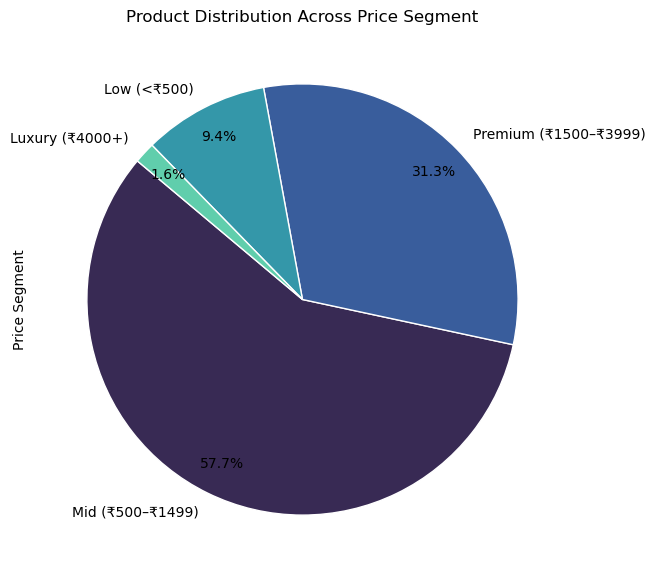

In [43]:
segment_counts = df["Price_Segment"].value_counts().reset_index()
segment_counts.columns = ["Price_Segment", "Product_Count"]

plt.figure(figsize=(8,7))
plt.pie(segment_counts["Product_Count"], labels=segment_counts["Price_Segment"], autopct='%1.1f%%',
        pctdistance=0.85,labeldistance=1.1,wedgeprops={'linewidth':1, 'edgecolor':'white'},
        startangle=140,colors=sb.color_palette("mako", len(segment_counts)))
plt.title("Product Distribution Across Price Segment")
plt.ylabel('Price Segment')
plt.show()

## Which categories dominate in each segment?

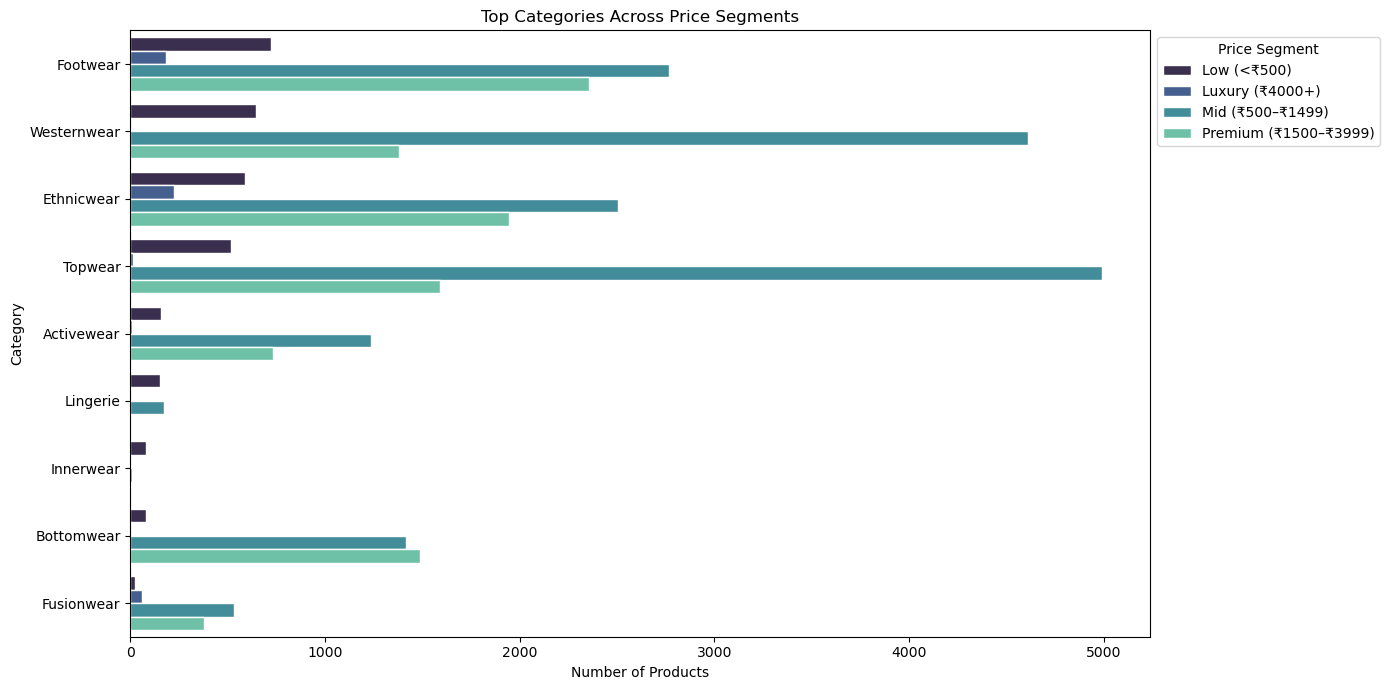

In [44]:
category_by_segment = df.groupby(["Price_Segment", "Category"]).size().reset_index(name="Count").sort_values(["Price_Segment","Count"], ascending=[True, False])

plt.figure(figsize=(14,7))
sb.barplot(x=category_by_segment.Count, y=category_by_segment.Category,
            hue=category_by_segment.Price_Segment,dodge=True,palette="mako",edgecolor='white')
plt.title("Top Categories Across Price Segments")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.legend(title="Price Segment", bbox_to_anchor=(1.0,1), loc="upper left")
plt.tight_layout()
plt.show()

## Compare Brand positioning

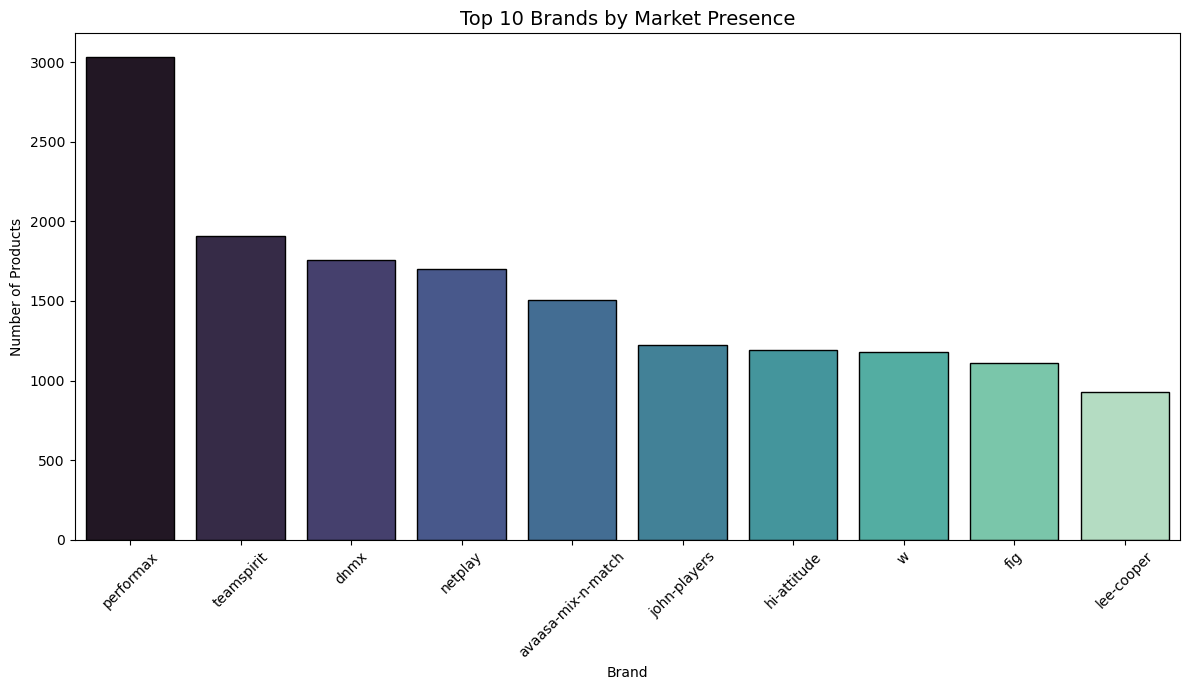

In [45]:
brand_positioning = df.groupby(["Brand", "Price_Segment"]).size().reset_index(name="Count").sort_values(["Brand", "Count"], ascending=[True, False])
top_brands =brand_positioning.groupby("Brand")["Count"].sum().sort_values(ascending=False).head(10)   

plt.figure(figsize=(12,7))
sb.barplot(x=top_brands.index,y=top_brands.values,palette="mako",edgecolor='black')
plt.title("Top 10 Brands by Market Presence", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### More than 50% product distribution is in the Mid Segment(Rs.500-Rs.1499). Topwear and Westernwear dominate Mid Price Segment.